## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print(X.isnull().any().any()) # пропусков нет
print(X.dtypes)#все признаки вещественные
print(np.isnan(y).any())
y.dtype

False
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object
False


dtype('int32')

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X1 = X_train['magnesium']
X2 = X_train['alcohol']
X_train = pd.DataFrame()
X_train['alcohol'] = X2
X_train['magnesium'] = X1

X1 = X_test['magnesium']
X2 = X_test['alcohol']
X_test = pd.DataFrame()
X_test['alcohol'] = X2
X_test['magnesium'] = X1

normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_transf = normalizer.transform(X_train)
X_test_transf = normalizer.transform(X_test)

neigh_num = [1,3,5,10,15,25]

answ = pd.DataFrame({'NN':[], 'Train':[], 'Test':[]})


for i in neigh_num:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_transf, y_train)
    y_pred = clf.predict(X_test_transf)
    y_pred1 = clf.predict(X_train_transf)
    df = pd.DataFrame({'NN' : [int(i)] , "Train" : [np.mean(y_train == y_pred1)], 'Test' : [np.mean(y_test == y_pred)]})
    answ = answ.append(df)
answ = answ.astype({'NN' : int})    
answ = answ.set_index('NN')
answ

,Train,Test
NN,,
1,1.000000,0.611111
3,0.830645,0.555556
5,0.814516,0.592593
10,0.790323,0.592593
15,0.741935,0.537037
25,0.758065,0.518519


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [6]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

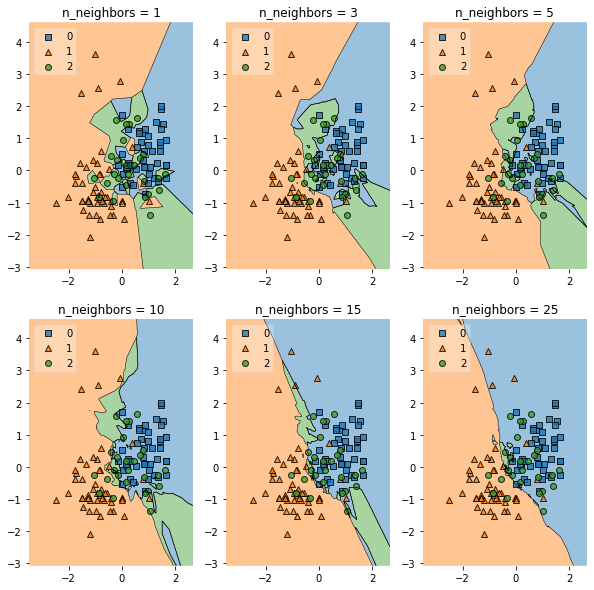

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = KNeighborsClassifier(n_neighbors=10)
clf5 = KNeighborsClassifier(n_neighbors=15)
clf6 = KNeighborsClassifier(n_neighbors=25)

gs = gridspec.GridSpec(2,3)

fig = plt.figure(figsize=(10,10))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X_train_transf, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transf, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [15]:
# оптимально использовать для обучения n = 5 или 10, так как у них доля правильных ответов одна из лучших
# также, исзодя из графиков, у n = 5, 10 есть более менее четкое разделение областей для каждых признаков
# в то время как n = 1 использовать не стоит,т.к несмотря на наибольшую долю правилных ответов, области получаются рваные
# у n = 25 слишком маленькая область для 2 класса

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

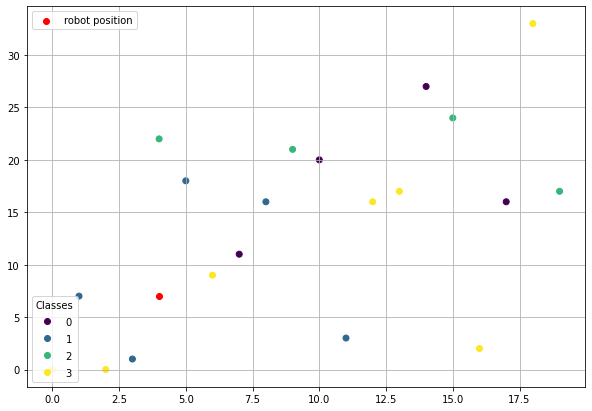

In [16]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
import random

class MobileRobot():
    global initial_position
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])  # <ВАШ КОД ЗДЕСЬ>
        
        # kNN Classifier for determining the classes of landmarks
        self.knn =  KNeighborsClassifier(n_neighbors = k).fit(landmarks, classes)   # <ВАШ КОД ЗДЕСЬ>
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        position = self.trajectory[len(self.trajectory) - 1]
        
        if np.random.binomial(n = 1, p = 0.8):
            current_class = self.knn.predict([position])
            position = position + self.mapping[int(current_class)]
            self.trajectory = np.append(self.trajectory ,[position], axis = 0)
            
        else:
            
            position = position + np.array([1,0])
            self.trajectory = np.append(self.trajectory, [position], axis = 0)
  

        
        
        # <ВАШ КОД ЗДЕСЬ>

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [19]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    
    
    # <ВАШ КОД ЗДЕСЬ>
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

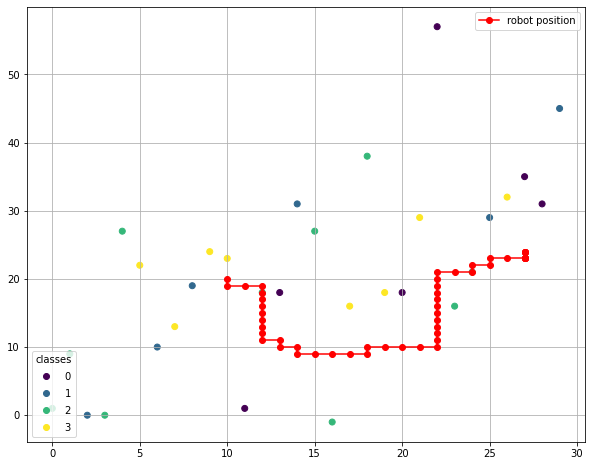

In [20]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

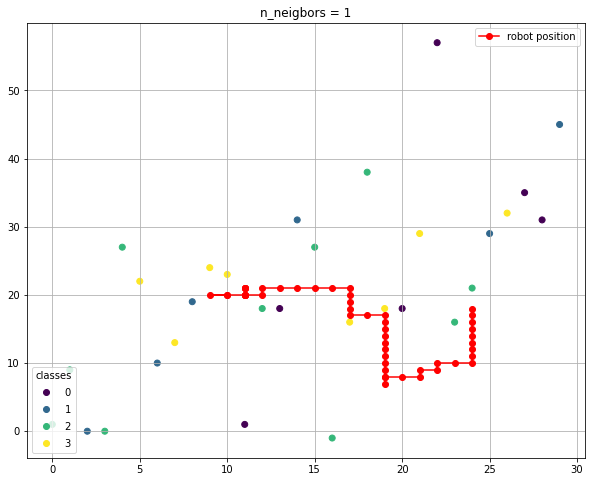

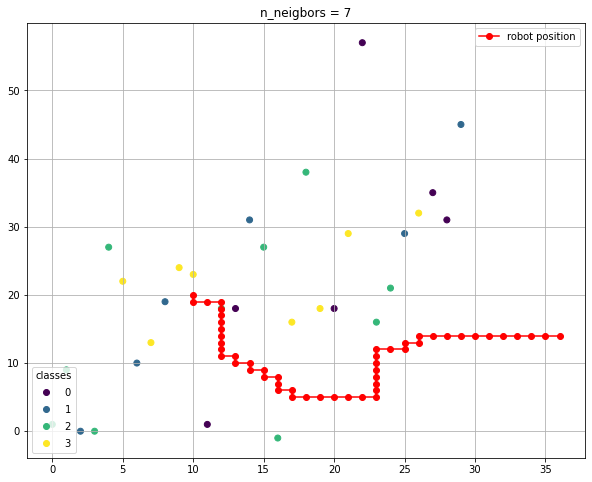

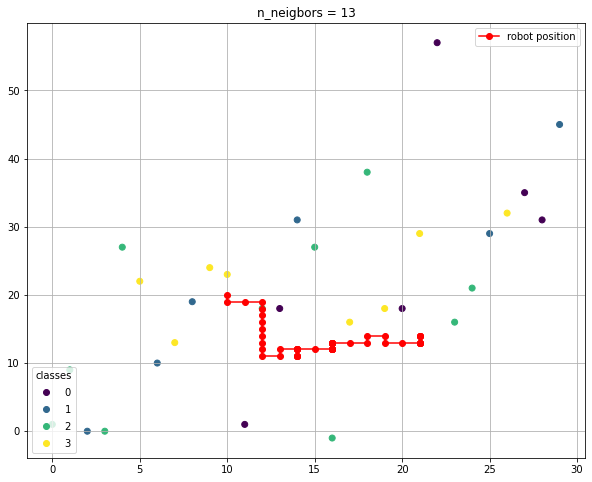

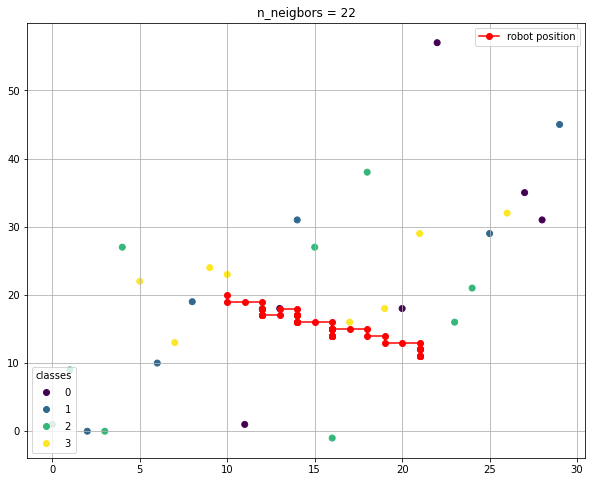

In [21]:
def conduct_experiment_4(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    
    
    # <ВАШ КОД ЗДЕСЬ>
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')
    plt.title('n_neigbors = ' + str(k))
    plt.plot()
    _ = plt.legend()
    _ = plt.grid()
x = np.arange(30)
for i in [1,7,13,22]:
    conduct_experiment_4(x, mean = 3, std = 10, k = i, n_movements = 50)
    
# число соседей сильно влияет на поведение робота
# например при n близком к числу точек, расстояние до точки почти не влияет,
#большее влияние оказывает количество точек определенного класса
# если бы классы присваивались точкам при помощи knn
# получилось бы несколько областей с точками одинаковых классов
# если бы класс, говорязий роботу идти вверх занимал бы верхнюю область
# попав область с приобладанием этого класса, робот бы двигался преимущественно вверх
# аналогично с левой, правой и нижней область
# также могла бы произойти ситуция где робот бы передвигался почти циклично
# если бы, например, правая область говорила идти вверх, верхняя - влево, левая - вниз, нижняя - вправо.


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [22]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [23]:
data.isnull().any().any() #пропусков нет

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [24]:
#столбец Unnamed 0 бессмысленен (он дублирует индесный столбец с сдвигом в 1)
data.drop(['Unnamed: 0'], axis =1, inplace = True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [25]:
Num_data = data._get_numeric_data()
a = Num_data.corr()
a['price']
#признаки carat и размеры (длина x, ширина y и высота z) 
#коррелируют с ценой больше всего

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [26]:
data = pd.get_dummies(data, drop_first = True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [27]:
# удалим целевую переменную и запишем ее в target
target = data.price
data.drop(['price'], axis = 1, inplace = True)
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)



**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [28]:
columns_to_mormalize = ['carat', 'depth', 'table', 'x', 'y', 'z']
x = X_train[columns_to_mormalize].values
x1 = X_test[columns_to_mormalize].values
normalizer = StandardScaler()
normalizer.fit(x)

x_scaled =normalizer.transform(x)
x1_scaled = normalizer.transform(x1)

X_train[columns_to_mormalize] = x_scaled
X_test[columns_to_mormalize] = x1_scaled

X_train

C:\Users\79152\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
13934,0.551161,-0.877055,-0.205037,0.798862,0.746942,0.646307,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
38054,-0.843309,0.316493,-1.100283,-0.877887,-0.839477,-0.818309,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
34090,-0.822180,-2.070604,2.033079,-0.770861,-0.770125,-0.959138,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
31919,-1.054592,0.737746,-0.205037,-1.288156,-1.290263,-1.212629,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17402,0.614546,-0.245176,-0.652660,0.781024,0.781618,0.744887,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,-0.948950,-0.315385,-1.547906,-1.047346,-1.064870,-1.071801,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
17730,0.445520,0.456911,1.585456,0.540215,0.556225,0.604059,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28030,-1.054592,0.246285,-1.100283,-1.279237,-1.220911,-1.212629,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15725,0.424391,0.807955,-0.205037,0.558052,0.504211,0.632224,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_pred1 = lr.predict(X_test)
print(mean_squared_error(y_train, y_pred))
print(mean_squared_error(y_test, y_pred1))


1270791.8536412274
1291193.898986285


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [30]:
# https://tonais.ru/library/lineynaya-regressiya-s-pomoschyu-scikit-learn-v-python
coeff_df = pd.DataFrame(lr.coef_, data.columns, columns=['Coefficient']) 
coeff_df

#коэффициент для carat во много раз превышает 
#коэффициенты других вещественный признаков
#коэффициент для x в 5 раз меньше коэффициента для carat, но он также
#сильно больше коэффициентов для другихвещественный признаков

,Coefficient
carat,5307.717343
depth,-90.909302
table,-63.022745
x,-1089.756486
y,0.346573
z,-40.204498
cut_Good,617.961140
cut_Ideal,858.752492
cut_Premium,788.367010
cut_Very Good,750.316849


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [31]:
# Lasso-регрессия
from sklearn.linear_model import Lasso

clf = Lasso(alpha = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_pred1 = clf.predict(X_test)
print(mean_squared_error(y_train, y_pred))
print(mean_squared_error(y_test, y_pred1))
coeff_df = pd.DataFrame(clf.coef_, data.columns, columns=['Coefficient']) 
coeff_df
# веса для вещественных признаков изменилисб не так сильно
# веса для категориальных признаков сильно уменьшились
# учитывая что среднеквадратичная ошибка в изначально регрессии 
# меньше, можно сделать вывод что проблема мультиколлинеарности проявилась не сильно

1509587.3817297015
1516945.2143878373


,Coefficient
carat,4755.439597
depth,-156.602866
table,-111.264940
x,-695.190274
y,-0.000000
z,-12.064760
cut_Good,-0.000000
cut_Ideal,158.196942
cut_Premium,76.671614
cut_Very Good,76.618541


In [32]:
# Ridge-регрессия
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha = 10)
clf_ridge.fit(X_train, y_train)
y_pred_ridge = clf_ridge.predict(X_train)
y_pred1_ridge = clf_ridge.predict(X_test)
print(mean_squared_error(y_train, y_pred_ridge))
print(mean_squared_error(y_test, y_pred1_ridge))
coeff_df = pd.DataFrame(clf_ridge.coef_, data.columns, columns=['Coefficient']) 
coeff_df
# веса уменьшились не так сильно, среднеквадратичная ошибка примерна одинакова
#вывод: проблема мультиколлинеарности проявилась не сильно

1274955.379257902
1292665.4513488824


,Coefficient
carat,5258.903080
depth,-94.670643
table,-66.141364
x,-1055.454472
y,1.037885
z,-39.345140
cut_Good,635.983587
cut_Ideal,881.331589
cut_Premium,808.955790
cut_Very Good,775.441594


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

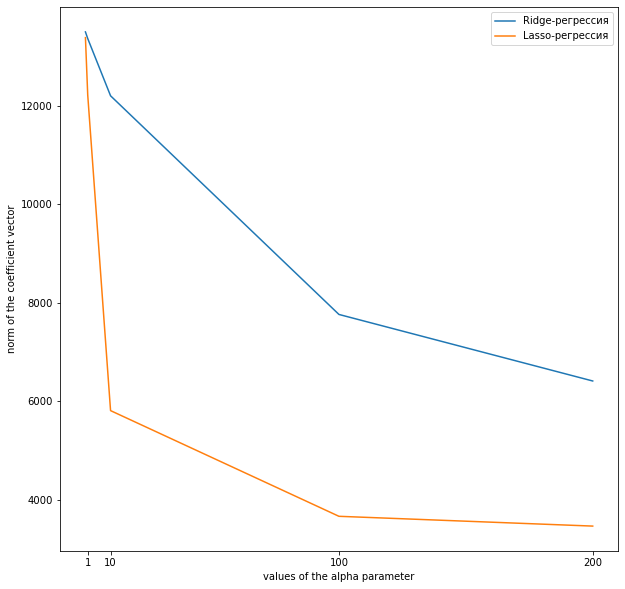

In [33]:
coefs_L = pd.DataFrame(columns = [0.1, 1, 10 ,100 ,200])
coefs_R = pd.DataFrame(columns = [0.1, 1, 10 ,100 ,200])

alphas = [0.1, 1, 10, 100, 200]

for a in alphas:
    clf_L = Lasso(alpha = a)
    clf_R = Ridge(alpha = a)
    clf_L.fit(X_train, y_train)
    clf_R.fit(X_train, y_train)
    coeff_df_L = pd.DataFrame(clf_L.coef_, data.columns, columns=['Coefficient'])
    coefs_L[a] = coeff_df_L
    coeff_df_R = pd.DataFrame(clf_R.coef_, data.columns, columns=['Coefficient'])
    coefs_R[a] = coeff_df_R

#запишем в массивы points_L и points_R точки для построения графиков.    
points_R = np.array([])
points_L = np.array([])
for i in alphas:
    points_R  = np.append(points_R, [np.linalg.norm(coefs_R[i])])
    points_L =  np.append(points_L, [np.linalg.norm(coefs_L[i])])
    
     
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(alphas, points_R, label = 'Ridge-регрессия')
ax.plot(alphas, points_L, label = 'Lasso-регрессия')
ax.legend()
ax.set_xlabel('values of the alpha parameter')
ax.set_ylabel('norm of the coefficient vector')
ax.set_xticks(alphas[1::])
plt.show()

# Lasso-регрессия намного агрессивнее уменьшает веса
# Lasso-регрессия может занулять коэффициенты для ненужных признаков, в то время как 
# линейная и Ridge ригрессия этого не делают, следовательно ненужные признаки 
# все еще будут нести вклад в целевую переменную при использовании этих регрессий


**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [34]:
from sklearn.linear_model import LassoCV
LCV = LassoCV(alphas = alphas,  cv=5)
LCV.fit(X_train, y_train)
a = LCV.mse_path_
alphs = LCV.alphas_
min_er = np.mean(a[0])
min_alpha = 0
for i in range(len(a)): # нахождение минимальной средней ошибки
    if(min_er >= np.mean(a[i])):
        min_er = np.mean(a[i])
        min_alpha = alphs[i]
    
print ('при alpha =', '{:0.1f}'.format(min_alpha),'средняя ошибка =',min_er)
# наибольшее качество дает альфа = 1, т.к. средняя ошибка при этом значении наименьшая        

    

при alpha = 1.0 средняя ошибка = 1279884.1041338164


C:\Users\79152\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2675607970.701214, tolerance: 47919147.97014151
  model = cd_fast.enet_coordinate_descent_gram(


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [37]:
clf_L = Lasso(alpha = 1)
clf_L.fit(X_train, y_train)
coeff_df = pd.DataFrame(clf_L.coef_, data.columns, columns=['Coefficient']) 
coeff_df

# carat имеет наибольший вес, т.к. цена брилианта напрямую зависит от веса
# чем лучше качество огранки, тем больший вес имеет соответствующий признак, думаю, это логично
# погуглив о чистоте (либо прозрачности бриллиантов), можно сделать вывод, что 
# прозрачные бриллианты выглядят лучше, следовательно, стоят дороже
# исходя из описания датафрейма с keggle.com, цвет j - худший, D - лучший
# в коэффициентах прослеживается такая же тенденция
# длина и высота имеют отрицательные коэффициента, возможно потому что большой
# бриллиант нужно обработать или оазрезать для того чтобы он стал частью украшения
# а это дополнительные затраты (возможно я не прав)))))
# table и depth связаны с x,y,z где y и z имеют очень маленькие веса, так что
# table и depth тоже имеют мальнькие веса. 

,Coefficient
carat,5249.276115
depth,-100.409424
table,-69.399096
x,-1049.608145
y,-0.000000
z,-36.138821
cut_Good,510.529245
cut_Ideal,755.017420
cut_Premium,684.781128
cut_Very Good,651.285976


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [38]:
y_pred = clf_L.predict(X_test)
y_pred1 = clf_L.predict(X_train)
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_train, y_pred1))

1292314.3025187731
1275440.9041688691


In [ ]:
#среднеквадр. ошибка из задания 3.7
#1291193.898986285
#1270791.8536412274

# изначальная регрессия проявила себя немного лучше,
# возможно датасет был неудачно разбит на тестовую и тренеровочную выборку
# или этих данных проблема проблема мультиколлинеарности не несет вклад